C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


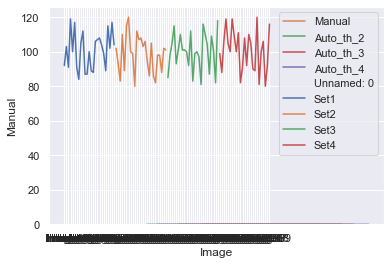

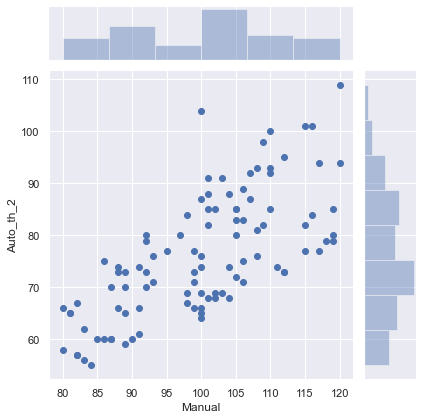

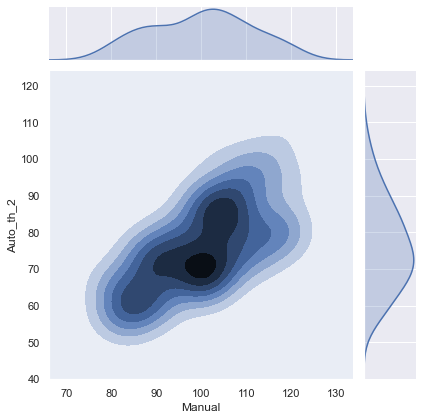

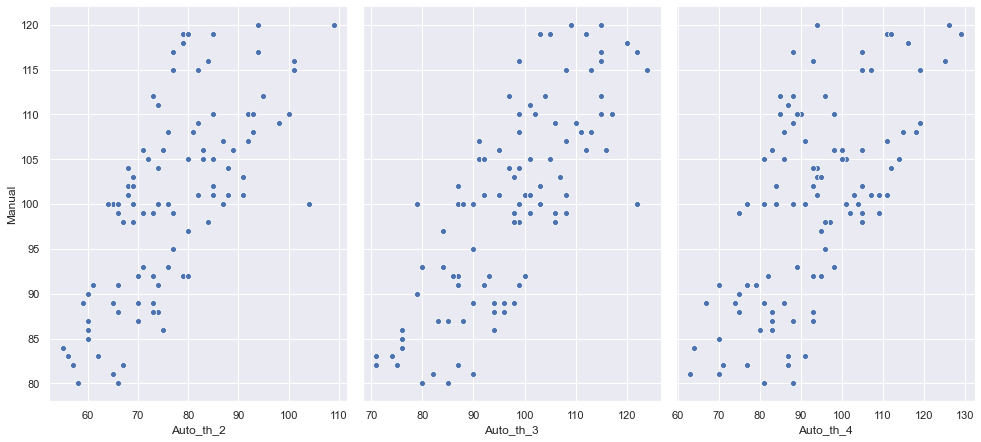

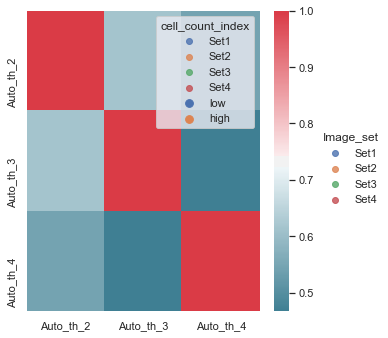

In [18]:
import pandas as pd
df = pd.read_csv('dataset.csv')
import seaborn as sns

df['Manual'].fillna(100, inplace=True)
sns.distplot(df['Manual'])   #The overlay over histogram is KDE plot (Kernel density distribution)

sns.kdeplot(df['Manual'], shade=True)

sns.kdeplot(df['Auto_th_2'], shade=True)
sns.kdeplot(df['Auto_th_3'], shade=True)
sns.kdeplot(df['Auto_th_4'], shade=True)

sns.set(style='darkgrid')   
sns.lineplot(x='Image', y='Manual', data=df, hue='Unnamed: 0') 

#Basic scatter plot
sns.jointplot(x="Manual", y="Auto_th_2", data=df)
#KDE plot, Kernel density estimation.
sns.jointplot(x="Manual", y="Auto_th_2", data=df, kind="kde")

sns.pairplot(df, x_vars=["Auto_th_2", "Auto_th_3", "Auto_th_4"], y_vars="Manual", size=6, aspect=0.75)

df = df.rename(columns = {'Unnamed: 0':'Image_set'})

sns.lmplot(x='Manual', y='Auto_th_2', data=df, hue='Image_set', order=1) 

def cell_count(x):
    if x <= 100.0:
        return "low"
    else:
        return "high"

df["cell_count_index"] = df["Manual"].apply(cell_count)

sns.swarmplot(x = "Image_set", y="Manual", data = df, hue="cell_count_index", dodge=True)

corr = df.loc[:,df.dtypes == 'int64'].corr() 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

